# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [169]:
import matplotlib.pyplot as plt
import random
import timeit

def jarvismarch(inputSet, plot = True):
    # Initialise list of points
    points = inputSet

    # Find index of leftmost point
    def leftMostIndex(points):
        firstIndex = 0 
        for i in range(1, len(points)):
            if points[i][0] < points[firstIndex][0]:
                firstIndex = i
            elif points[i][0] == points[firstIndex][0]:
                if points[i][1] > points[firstIndex][1]:
                    firstIndex = i
        return firstIndex

    # Determine orientation of three points
    def determinantOrientation(p, q, r):
        val = (q[1] - p[1]) * (r[0] - p[0]) - (q[0] - p[0]) * (r[1] - p[1])

        if val == 0:
            return 0
        elif val > 0:
            return 1
        else:
            return 2
    
    # Plot points and convex hull if required
    def plotPoints(points, hull):
        x = [p[0] for p in points]
        y = [p[1] for p in points]
        hullX = [p[0] for p in hull]
        hullY = [p[1] for p in hull]

        plt.title("Jarvis March")
        plt.xlabel("x-axis")
        plt.ylabel("y-axis")
        plt.scatter(x, y, 10, color = "black")
        plt.plot(hullX, hullY, color = "red")
        plt.show()

    # Ensure there are at least 3 points to form polygon
    n = len(points)
    if n < 3:
        return
    
    # Start algorithm
    first = leftMostIndex(points)
    outputSet = []
    p = first
    while True:
        outputSet.append(points[p])
        q = (p + 1) % n
        for r in range(n):
            if determinantOrientation(points[p], points[q], points[r]) == 2:
                q = r
        p = q
        if p == first:
            break
    
    # Close convex hull by adding starting point again
    outputSet.append(outputSet[0]) # added the starting point again to close the convex hull
    if plot:
        plotPoints(points, outputSet)

    return outputSet

Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [170]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import timeit

def grahamscan(inputSet, plot = True):
    
    pts = inputSet
        
    # Sort points with respect to bottom-most point
    def sort(pts):
        # Compare angles between two points relative to p0
        def compareAngles(p1, p2):
            # Calculate angles using atan2
            angle1 = math.atan2(p1[1] - p0[1], p1[0] - p0[0])
            angle2 = math.atan2(p2[1] - p0[1], p2[0] - p0[0])
            return angle1 < angle2
        # Partition array for quicksort
        def partition(arr, low, high):
            pivot = arr[high]
            i = low - 1
            for j in range(low, high):
                if compareAngles(arr[j], pivot):
                    i += 1
                    arr[i], arr[j] = arr[j], arr[i]
            arr[i + 1], arr[high] = arr[high], arr[i + 1]
            return i + 1
        
        # Sort points based on angle with p0
        def quicksort(arr, low, high):
            if low < high:
                pi = partition(arr, low, high)
                quicksort(arr, low, pi - 1)
                quicksort(arr, pi + 1, high)
        # Early return if not enough points
        if len(pts) < 3:
            return pts
        
        # Find bottom-most point
        p0 = min(pts, key=lambda p: p[0])
        pts.remove(p0)
        quicksort(pts, 0, len(pts) - 1)
        pts.insert(0, p0)
        return pts
    
    def plotPoints(points, hull):
        x = [p[0] for p in points]
        y = [p[1] for p in points]
        hullX = [p[0] for p in hull]
        hullY = [p[1] for p in hull]

        plt.title("Graham Scan")
        plt.xlabel("x-axis")
        plt.ylabel("y-axis")
        plt.scatter(x, y, 10, color = "black")
        plt.plot(hullX, hullY, color = "red")
        plt.show()
    
    # Sort points before algorithm starts
    pts = sort(pts)
    p0 = pts[0]

    outputSet = []

    # Calculate cross product of vectors p1p2 and p1p3
    def crossProduct(p1, p2, p3):
        return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

    for i, p in enumerate(pts):
        # Remove points from stack if no left turn formed
        while len(outputSet) > 1 and crossProduct(outputSet[-2], outputSet[-1], p) <= 0:
            outputSet.pop()
        outputSet.append(p)
    
    if plot:
        fig, ax = plt.subplots()
        plotPoints(pts, outputSet)
        plt.tight_layout()
        plt.show()

    return outputSet

Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [171]:
import math
import timeit
import matplotlib.pyplot as plt
import random

def chen(inputSet, plot = True):

    def orientation(p, q, r):
        '''
        returns 0 if p, q, r are colinear, 1 if they are clockwise, -1 if they are counterclockwise
        '''
        val = (q[0] - p[0])*(r[1] - p[1]) - (r[0] - p[0])*(q[1] - p[1])
        return (val > 0) - (val < 0)
    
    def searchTangent(subset, p):
        if p in subset:
            return subset[(subset.index(p) + 1) % len(subset)]
        left, right = 0, len(subset)
        lprev = orientation(p, subset[0], subset[-1])
        lnext = orientation(p, subset[0], subset[(left + 1) % right])
        while left < right:
            mid = (left + right) // 2
            mprev = orientation(p, subset[mid], subset[(mid - 1) % len(subset)])
            mnext = orientation(p, subset[mid], subset[(mid + 1) % len(subset)])
            mside = orientation(p, subset[left], subset[mid])
            if mprev != -1 and mnext != -1:
                return subset[mid]
            elif mside == 1 and (lnext == -1 or lprev == lnext) or mside == -1 and mprev == -1:
                right = mid
            else:
                left = mid + 1
                lprev = -mnext
                lnext = orientation(p, subset[left-1], subset[(left + 1) % len(subset)])
        return subset[0]
    pts = inputSet

    def plotPoints(points, hull):
        x = [p[0] for p in points]
        y = [p[1] for p in points]
        hull_x = [p[0] for p in hull]
        hull_y = [p[1] for p in hull]

        plt.title("Chan's Algorithm")
        plt.xlabel("x-axis")
        plt.ylabel("y-axis")
        plt.scatter(x, y, 10, color = "black")
        plt.plot(hull_x, hull_y, color = "red")
        plt.show()

    n = len(pts)
    m = int(math.sqrt(n))
    t = 1

    # This loop is to automatically find a proper m without manually setting it to eliminate the case the algorithm incompletes when testing
    if plot:
        fig, ax = plt.subplots()

    while True:
        m = min(m, n)
        subsets = [pts[i:i + m] for i in range(0, n, m)]
        hulls = [grahamscan(subset, plot=False) for subset in subsets]
        p0 = min(min(hulls), key=lambda p: p[0])
        outputSet = []
        pthis = p0

        for _ in range(1, m+1):
            tangents = []
            for hull in hulls:
                tangent = searchTangent(hull, pthis)
                tangents.append(tangent)
            mostCwTangent = tangents[0]
            for i in range(1, len(tangents)):
                if orientation(pthis, mostCwTangent, tangents[i]) < 0:
                    mostCwTangent = tangents[i]
            pthis = mostCwTangent
            outputSet.append(mostCwTangent)
            if pthis == p0:
                if plot:
                    plotPoints(pts, outputSet)
                    plt.tight_layout()
                    plt.show()
                return outputSet

        t += 1
        m = min(2**(2**t), len(pts))
    return "incomplete"

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [172]:
import random

class TestDataGenerator():
    
    def __init__(self, xRange, yRange):
        self.xRange = xRange
        self.yRange = yRange

    def generateRandomConvexPolygon(self, n):
        # Generate two lists of random X and Y coordinates within the range 1 to 10,000
        xPool = [random.randint(0, 32767) for _ in range(n)]
        yPool = [random.randint(0, 32767) for _ in range(n)]
        
        xPool.sort()
        yPool.sort()

        # Isolate the extreme points
        minX, maxX = xPool[0], xPool[-1]
        minY, maxY = yPool[0], yPool[-1]

        # Divide the interior points into two chains & Extract the vector components
        xVec, yVec = [], []

        last_top, last_bot = minX, minX
        for x in xPool[1:-1]:
            if random.choice([True, False]):
                xVec.append(x - last_top)
                last_top = x
            else:
                xVec.append(last_bot - x)
                last_bot = x
        xVec += [maxX - last_top, last_bot - maxX]

        lastLeft, lastRight = minY, minY
        for y in yPool[1:-1]:
            if random.choice([True, False]):
                yVec.append(y - lastLeft)
                lastLeft = y
            else:
                yVec.append(lastRight - y)
                lastRight = y
        yVec += [maxY - lastLeft, lastRight - maxY]

        # Randomly pair up the X- and Y-components
        random.shuffle(yVec)

        # Combine the paired up components into vectors
        vec = [(xVec[i], yVec[i]) for i in range(n)]

        # Sort the vectors by angle
        vec.sort(key=lambda v: math.atan2(v[1], v[0]))

        # Lay them end-to-end
        x, y = 0, 0
        minPolygonX, minPolygonY = 0, 0
        points = []

        for vx, vy in vec:
            points.append((x, y))
            x += vx
            y += vy
            minPolygonX = min(minPolygonX, x)
            minPolygonY = min(minPolygonY, y)

        # Move the polygon to the original min and max coordinates
        xShift = minX - minPolygonX
        yShift = minY - minPolygonY
        points = [(int(p[0] + xShift), int(p[1] + yShift)) for p in points]
        return points

    def isPointInsidePolygon(self, x, y, polygon):
        n = len(polygon)
        inside = False
        p1x, p1y = polygon[0]
        for i in range(n + 1):
            p2x, p2y = polygon[i % n]
            if y > min(p1y, p2y):
                if y <= max(p1y, p2y):
                    if x <= max(p1x, p2x):
                        if p1y != p2y:
                            xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                        if p1x == p2x or x <= xinters:
                            inside = not inside
            p1x, p1y = p2x, p2y
        return inside

    def generatePointsInsidePolygon(self, polygon, numPoints):
        minX = min(polygon, key=lambda t: t[0])[0]
        maxX = max(polygon, key=lambda t: t[0])[0]
        minY = min(polygon, key=lambda t: t[1])[1]
        maxY = max(polygon, key=lambda t: t[1])[1]
        pointsInside = []
        while len(pointsInside) < numPoints:
            x = random.randint(minX, maxX)
            y = random.randint(minY, maxY)
            if self.isPointInsidePolygon(x, y, polygon):
                pointsInside.append((x, y))
        return pointsInside
    
    def generateRandomPoints(self, n):
        points = []
        for i in range(n):
            points.append((random.randint(self.xRange[0], self.xRange[1]), random.randint(self.yRange[0], self.yRange[1])))
        return points


Use the cell below to implement the requested **experimental framework** API.

In [173]:
import timeit
import matplotlib

class ExperimentalFramework():
    def __init__(self, nRange, hRange, xRange, yRange, chan = True, graham = True, jarvis = True, equal = False):
        self.nRange = nRange
        self.hRange = hRange
        self.xRange = xRange
        self.yRange = yRange
        self.results = []
        self.includeChans = chan
        self.includeGraham = graham
        self.includeJarvis = jarvis
        self.equal = equal

    def timeAlgorithms(self, points):
        chansTime, grahamTime, jarvisTime = None, None, None
        if self.includeChans:
            chansTime = timeit.timeit(lambda: chen(points, plot=False), number=1)
        if self.includeGraham:
            grahamTime = timeit.timeit(lambda: grahamscan(points, plot=False), number=1)
        if self.includeJarvis:
            jarvisTime = timeit.timeit(lambda: jarvismarch(points, plot=False), number=1)
        return chansTime, grahamTime, jarvisTime

    def runExperiment(self, count=1):
        for n in self.nRange:
            for h in self.hRange:
                if self.equal and n != h:
                    continue
                dataGen = TestDataGenerator(self.xRange, self.yRange)
                if h:
                    hull = dataGen.generateRandomConvexPolygon(h)
                    points = hull + dataGen.generatePointsInsidePolygon(hull, n-h)
                else:
                    points = dataGen.generateRandomPoints(n)
                chansTimes, grahamTimes, jarvisTimes = [], [], []
                for _ in range(count):
                    chansTime, grahamTime, jarvisTime = self.timeAlgorithms(points)
                    if self.includeChans:
                        chansTimes.append(chansTime)
                    if self.includeGraham:
                        grahamTimes.append(grahamTime)
                    if self.includeJarvis:
                        jarvisTimes.append(jarvisTime)
                chansMean = sum(chansTimes) / count if self.includeChans else None
                grahamMean = sum(grahamTimes) / count if self.includeGraham else None
                jarvisMean = sum(jarvisTimes) / count if self.includeJarvis else None
                self.results.append((n, h, chansMean, grahamMean, jarvisMean))
    
    def plotResults(self):
        hValuesSet = set(h for _, h, _, _, _ in self.results)
        for h in hValuesSet:
            plt.figure(figsize=(10, 6))
            if self.equal:
                nValues, chansTimes, grahamTimes, jarvisTimes = zip(*[(n, ct, gt, jt) for n, _, ct, gt, jt in self.results])
            else:
                nValues, chansTimes, grahamTimes, jarvisTimes = zip(*[(n, ct, gt, jt) for n, h_val, ct, gt, jt in self.results if h_val == h])
            if self.includeChans:
                plt.plot(nValues, chansTimes, label='Chan\'s Algorithm')
                plt.scatter(nValues, chansTimes, 5, color='black')
            if self.includeGraham:
                plt.plot(nValues, grahamTimes, label='Graham Scan Algorithm')
                plt.scatter(nValues, grahamTimes, 5, color='black')
            if self.includeJarvis:
                plt.plot(nValues, jarvisTimes, label='Jarvis March Algorithm')
                plt.scatter(nValues, jarvisTimes, 5, color='black')
            plt.xlabel('Number of Points (n)')
            plt.ylabel('Execution Time (seconds)')
            plt.legend()
            if self.equal:
                plt.title(f'n = h')
                break
            plt.title(f'h = {h}')
        plt.show()

    def plotResultsOneAlgorithm(self):
        hValuesSet = sorted(set(h for _, h, _, _, _ in self.results))
        plt.figure(figsize=(10, 6))
        for h in hValuesSet:
            nValues, chansTimes, grahamTimes, jarvisTimes = zip(*[(n, ct, gt, jt) for n, hVal, ct, gt, jt in self.results if hVal == h])
            if self.includeGraham:
                plt.plot(nValues, grahamTimes, label=str(h))
                plt.scatter(nValues, grahamTimes, 5, color='black')
                title = 'Graham Scan Algorithm'
            if self.includeChans:
                plt.plot(nValues, chansTimes, label=str(h))
                plt.scatter(nValues, chansTimes, 5, color='black')
                title = 'Chan\'s Algorithm'
            if self.includeJarvis:
                plt.plot(nValues, jarvisTimes, label=str(h))
                plt.scatter(nValues, jarvisTimes, 5, color='black')
                title = 'Jarvis March Algorithm'
            plt.xlabel('Number of Points (n)')
            plt.ylabel('Execution Time (seconds)')
            plt.title(title)
            plt.legend()
        plt.show()  

    def plotResults3d(self):
        nValues, hValues, chansTimes, jarvisTimes = zip(*[(n, h, ct, jt) for n, h, ct, _, jt in self.results])

        if self.includeChans:
            algorithmTime = chansTimes
            title = 'Chan\'s Algorithm'
        if self.includeJarvis:
            algorithmTime = jarvisTimes
            title = 'Jarvis March Algorithm'

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Color by execution time: normalize and map the execution time to a colormap
        timesNormalized = [t / max(algorithmTime) for t in algorithmTime]
        colors = plt.cm.jet(timesNormalized)

        scatter = ax.scatter(nValues, hValues, algorithmTime, c=colors, marker='o')

        ax.set_xlabel('Number of Points (n)')
        ax.set_ylabel('Hull Size (h)')
        ax.set_zlabel('Execution Time (seconds)')
        plt.title(title)
        plt.show()

    def printResults(self):
        headers = ['n', 'h', "Chan's Algorithm Time", 'Graham Scan Time', 'Jarvis March Time']
        data = self.results
        lengths = [max(len(str(val)) for val in col) for col in zip(headers, *data)]
        lengths = [max(len(headers[i]), lengths[i]) for i in range(len(lengths))]
        rowFormat = '|'.join(['{:<' + str(length) + '}' for length in lengths])
        print(rowFormat.format(*headers))
        for row in data:
            print(rowFormat.format(*row))

Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

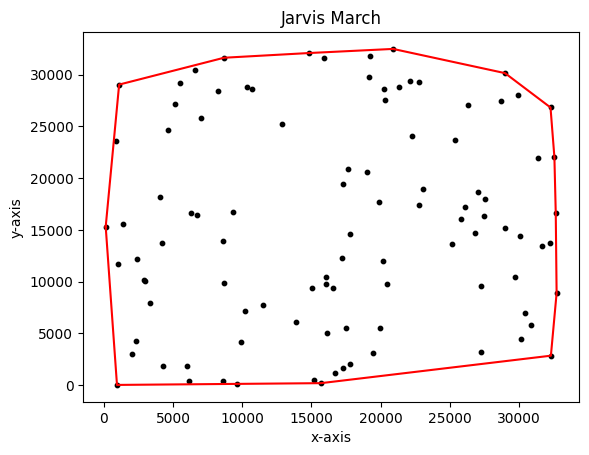

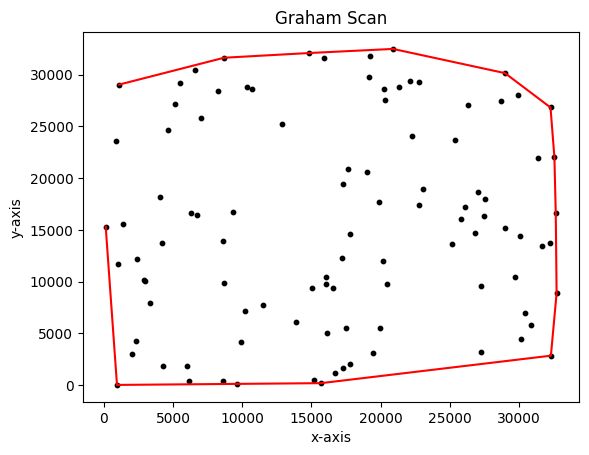

<Figure size 640x480 with 0 Axes>

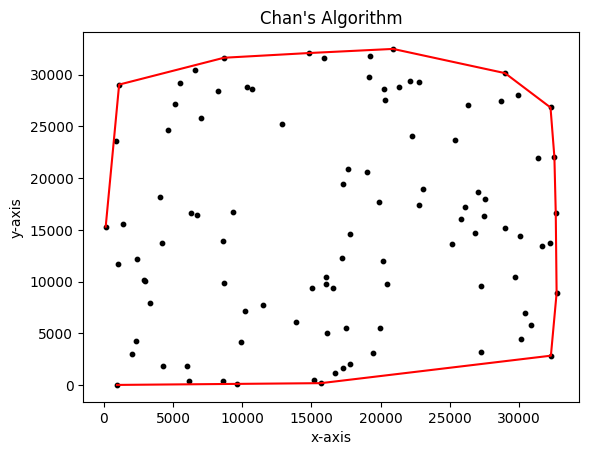

<Figure size 640x480 with 0 Axes>

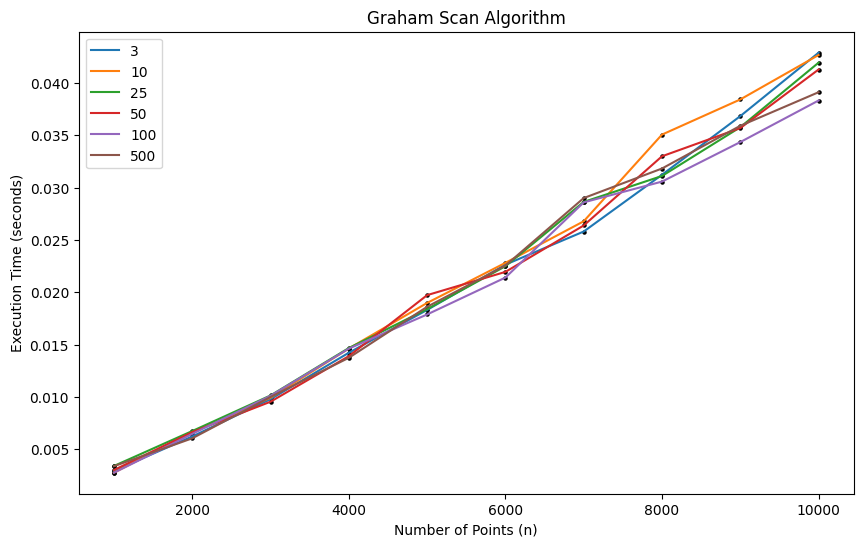

In [174]:
# Initialize the data generator with required x and y range
generator = TestDataGenerator((0, 32767), (0, 32767))

randomPoints = generator.generateRandomPoints(100)

# Algorithm animations to show the procedure
jarvismarch(randomPoints, plot=True)
grahamscan(randomPoints, plot=True)
chen(randomPoints, plot=True)

n = range(10000,100001,10000)
h = [3,10,25,100]

# 3d Graph Generation for Chan's algorithm
framework = ExperimentalFramework(range(1, 1000, 10), range(3, 100, 3), (0, 32767), (0, 32767), graham=False, jarvis=False)
framework.runExperiment(count = 1)
framework.plotResults3d()

# 3d Graph Generation for Jarvis March
framework = ExperimentalFramework(range(1, 1000, 10), range(3, 100, 3), (0, 32767), (0, 32767), chan=False, graham=False)
framework.runExperiment(count = 1)
framework.plotResults3d()

# 2d Graph Generation for Graham Scan
framework = ExperimentalFramework(range(1000, 10001, 1000), [3,10,25,50,100,500], (0, 32767), (0, 32767), jarvis=False, chan=False)
framework.runExperiment(count = 1)
framework.plotResultsOneAlgorithm()

# n = h graph up (1000 points)
n = range(100,1001,100)
framework = ExperimentalFramework(n, n, (0, 32767), (0, 32767), equal=True)
framework.runExperiment(count = 100)
framework.plotResults()

# fixed h=3 change n graph (10000 points)
n = range (1000,10001,1000)
h = [3]
framework = ExperimentalFramework(n, h, (0, 32767), (0, 32767))
framework.runExperiment(count = 50)
framework.plotResults()

# fixed h=50 change n graph (100000 points)
n = range (10000,100001,10000)
h = [50]
framework = ExperimentalFramework(n, h, (0, 32767), (0, 32767))
framework.runExperiment(count = 10)
framework.plotResults()

# fixed h=50 change n no jarvis (2600000 points)
n = range(100000, 2600001, 500000)
h = [50]
framework = ExperimentalFramework(n, h, (0, 32767), (0, 32767), jarvis=False)
framework.runExperiment(count = 10)
framework.plotResults()

# change h change n graph for graham scan (10000 points)
n = range(1000,10001,1000)
h = [3,10,25,50,100,500]
framework = ExperimentalFramework(n, h, (0, 32767), (0, 32767), jarvis=False, chan=False)
framework.runExperiment(count = 10)
framework.plotResultsOneAlgorithm()